# KNN RECONOCIMIENTO DE PATRONES- SELFIES

<img src="PORTADA.png">

# Importación de librerias:

In [20]:
#importamos matplotlib y demas librerias, tambien activamos la funcion (inline)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
from random import randint
# Nota: En caso de no importar alguna libreria, favor instalarla de la manera adecuada.

# Cargamos las fotografias.

In [21]:

files = glob.glob ("FotosCristianDaniel/*.png") # Cargamos todas las imagenes.
data = []
images = []
target = []
i = 0
for myFile in files:
    #cargamos una imagen de color en modo escala de grisis
    img = cv2.imread(myFile,cv2.IMREAD_UNCHANGED)
    images.append (img)
    a = img.reshape((67500,))
    data.append (a)
    if i <= 199:
        target.append(0)
    else:
        target.append(1)
    i+=1
    
dat = np.array(data)
tar = np.array(target)
q = np.array(images)
dic = {'data': dat, 'images': q, 'target' : tar}

# Visualización de las fotografías.

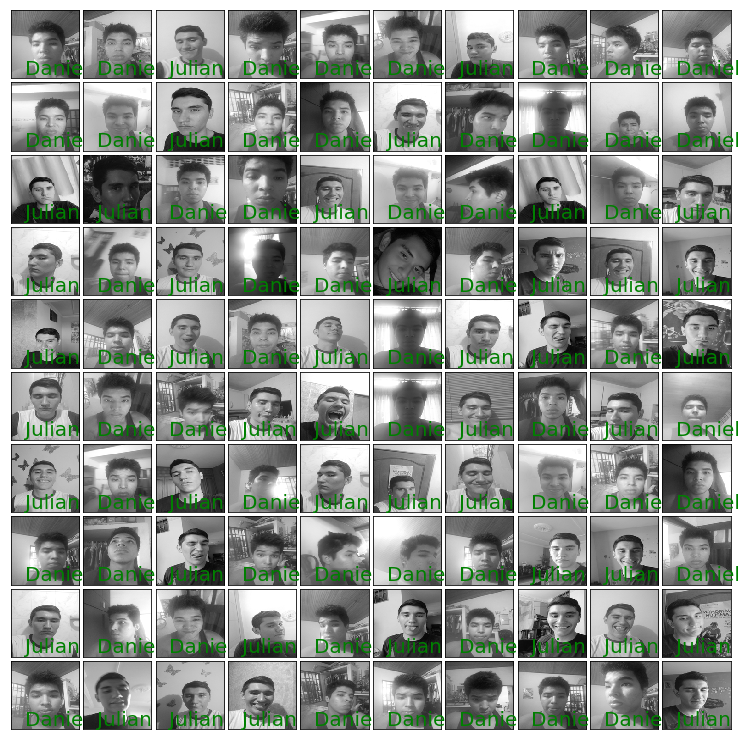

In [22]:
fig = plt.figure(figsize=(10, 10))# Tamaño de la figura
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.06)
# Trazar los digitos: cada imagen es 8x8 pixeles
for i in range(100):
    k = randint(0, 399)
    ax = fig.add_subplot(10,10, i + 1, xticks=[], yticks=[])
    ax.imshow(dic['images'][k], cmap=plt.cm.binary, interpolation='nearest')
    
    # Etiquetar la imagen con el valor objetivo = (Funcion Objetivo)
   
    txt="Daniel" if dic['target'][k] == 0 else "Julian" # Etiqueta
    ax.text(30, 140, txt, color='green',size=20)


# Visualización de Datos

Un buen primer paso para muchos problemas es visualizar los datos usando Reduccion de la Dimensionalidad.

Metodo espectral lineal: Analisis de Componentes Principales (PCA).

PCA busca las combinaciones lineales ortogonales de las caracteristicas que muestran las mayores variantes, y como tal, puede ayudar darle una buena idea de la estructura del conjunto de datos. vamos a utilizar Randomized_PCA, porque es mas rapido para N Grande. 

In [23]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2, random_state=1999)
proj = pca.fit_transform(dic['data'])

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


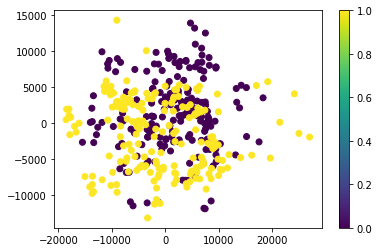

In [24]:
plt.scatter(proj[:, 0], proj[:, 1], c=dic['target'])
plt.colorbar()

Aqui vemos que las fotografias se agrupan bastante bien, asi que podemos esperar incluso un esquema de clasificacion bastante ingenuo para hacer un trabajo decente en terminos de separacion.

Una debilidad de PCA es que produce una reduccion de la dimensionalidad lineal: Esto puedo perder algunas relaciones interesantes en los datos. Si queremos un mapeo no lineal de los datos, podemos utilizar uno de los varios metodos de RD. Aqui utilizaremos ISOMAP, que es un metodo de aprendizaje multiple basado en teoria de grafos.

In [25]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(dic['data'])

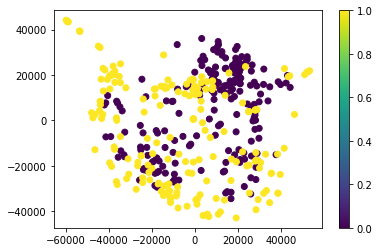

In [26]:
plt.scatter(proj[:, 0], proj[:, 1], c=dic['target'])
plt.colorbar()

# Clasificacion mediante KNN

KNN es un algoritmo no parametrico, el cual calcula un nuevo dato segun los ejemplos (Datos) y su configuracion del universo observable llamado K.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

# Entrenamiento.

In [28]:
#Dividir nuestros datos en conjuntos de entrenamiento y validacion
X_train, x_test, y_train, y_test = train_test_split(dic['data'], dic['target'], random_state=0)

#Entrenar el modelo
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# Utilizar el modelo para predecir las etiquetas de los datos de prueba
predicted = clf.predict(x_test)
expected = y_test #funcion objetivo

# Visualización de las fotografías con el algoritmo entrenado

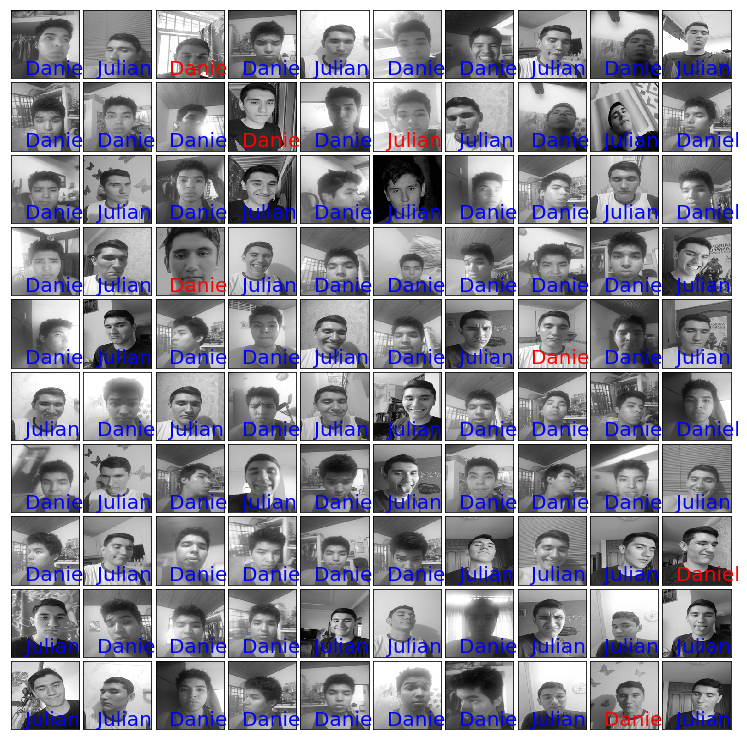

In [34]:
# Vamos a ver que tan bien funciona?
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.05, wspace=0.06)

#trazar los digitos:
for i in range(100):
    ax= fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test.reshape(-1,150,150,3)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    #Etiqueta la imagen con el valor objetivo
    
    txt="Daniel" if predicted[i] == 0 else "Julian" # Etiqueta
    if predicted[i] == expected[i]:
        ax.text(30, 140, txt, color='blue',size=20) #Prediccion acertada.
    else:
        ax.text(30, 140, txt, color= 'red',size=20)  #Prediccion fallida.

Las fotografías con las etiquetas de color verde indican que el algoritmo reconocio con precisión a la persona, sin embargo las fotografías con etiquetas de color rojo indican que el algoritmo no reconocio con exactitud a la persona.

# Medida Cuantitativa del Rendimiento

Nos gustaria medir el rendimiento de nuestro estimador sin tener que recurrir a trazar ejemplos. Un metodo simple podría ser simplemente comparar el numero de encontrados:

In [30]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

93
100


In [31]:
# manera manual de saber que tan bien nos fue!!!
print("Rendimiento de nuestro estimador de forma manual :")
matches.sum()/ float(len(matches))

Rendimiento de nuestro estimador de forma manual :


0.93

In [32]:
#Manera de sklearn de hacerlo.
print("Rendimiento de nuestro estimador:",clf.score(x_test, y_test))

Rendimiento de nuestro estimador: 0.93


Como conclusion final, podemos resaltar el alto grado de precision de nuestro algoritmo de reconocimiento, teniendo en cuenta el nivel de complejidad que resulta identificar caracteristicas faciales.